<a href="https://colab.research.google.com/github/vishalbalaji-v/Personal-Projects/blob/main/Guided%20Projects%20/%20Rossman%20Kaggle%3A%20Forecasting%20Sales%20/%20Part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-2: Trees, Model Interrogation and Bayesian Workflow
# Homework 2: Rossman Kaggle: Forecasting Sales
# Part 2 : Modelling without embeddings!
**ML-2 Cohort 1** <br>
**Instructor: Dr. Rahul Dave**<br>
**Max Score: 100** <br>

In [ ]:
#importing libraries
import numpy as np
import scipy.stats
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import pickle
import csv
from datetime import datetime
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

## Part 2: Modelling without Entity Embeddings

Remember the parameters we need to use

![Parameters.jpeg](https://drive.google.com/uc?export=view&id=1ROfqM3F5hWwJyrvQr_J1ATovNIW5niOs)

Lets import the feature_train_data.pickle file and set X,y values from the pickle file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f = open('/content/drive/MyDrive/Colab files/Homework 2 - ML2/feature_train_data.pickle','rb')
(X, y) = pickle.load(f)

In [ ]:
# we will split the train_ratio and 90% and 10% and set the train_size
train_ratio = 0.9
num_records = len(X)
train_size = int(train_ratio * num_records)

In [ ]:
#lets look at our data
X[1], y[1]

(array([   0,    0,    0, 1058,    1,    0,    0,    1]), 4491)

The next set of inputs is following:

1. Do you want to one hot encode the data?
2. Do you want to provide embeddings as input - this will be set to True for models with entity embeddings
3. Do you want to save the emmbeddings? - again set to true if you want to entity embeddings
4. if 3 is set to true, we want to save them to a embeddings.pickle


In [ ]:
one_hot_as_input = True #one_hot is set to True
embeddings_as_input = False #embeddings later on needs to set to true for Part 3
save_embeddings = False
saved_embeddings_fname = "embeddings.pickle"  # set save_embeddings to True to create this file

Define a function to one hot encode the training set and after split transform your training set using the function

In [ ]:
def OneHot(train_lists, test_lists):
    #your code here
    Hot = OneHotEncoder()
    Hot.fit(train_lists)
    return(Hot.transform(train_lists),Hot.transform(test_lists))


Split the data into X_train, X_val, y_train, y_val based on the train_size

In [ ]:
#your code here
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=train_ratio, random_state = 42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(759904, 8) (84434, 8) (759904,) (84434,)


In [ ]:
if one_hot_as_input == True:
  X_train,X_val = OneHot(X_train,X_val)
  print(X_train.shape, X_val.shape)

(759904, 1183) (84434, 1183)


In [ ]:
y_train = np.log(y_train)
y_val = np.log(y_val)

(array([1.00000e+00, 2.00000e+00, 3.00000e+00, 3.90000e+01, 1.04800e+03,
        1.89780e+04, 2.37120e+05, 4.23119e+05, 7.70120e+04, 2.58200e+03]),
 array([ 3.8286414 ,  4.50924494,  5.18984849,  5.87045204,  6.55105558,
         7.23165913,  7.91226268,  8.59286623,  9.27346977,  9.95407332,
        10.63467687]),
 <a list of 10 Patch objects>)

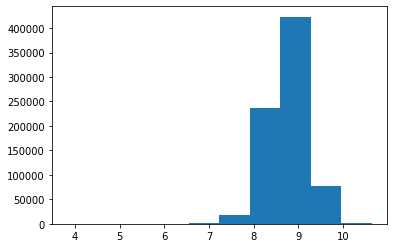

In [ ]:
plt.hist(y_train)

Lets also sample the data

**Why do we do this??**

your answer here

In [ ]:
def sample(X, y, n):
    '''random samples'''
    num_row = X.shape[0]
    indices = np.random.randint(num_row, size=n)
    return X[indices, :], y[indices]

In [ ]:
X_train, y_train = sample(X_train, y_train, 200000)  # Simulate data sparsity
print("Number of samples used for training: " + str(y_train.shape[0]))

Number of samples used for training: 200000


## Now lets work with Models without embedding!!

**Lets define MAPE first**

In [ ]:
#defining mape
def MAPE(Y_actual,Y_Predicted):
    #your code here
    error = []
    for i in range(len(Y_actual)):
      error.append(abs((Y_actual[i] - Y_Predicted[i])/Y_actual[i]))
    return(np.mean(error))

**We will be log-transforming the dependent variable(y) because it is long-tailed** - keep this in mind for each model or do the conversion after you split the data itself

### 2.1: Random Forests

1. Define a RandomForestRegressor model - with n_esitmators = 200, max_depth = 35, min_samples_split = 2, min_samples_leaf = 1
2. Fit on the training data
3. Predict on the validation and training data
4. evaluate the model - calculate the MAPE for validation and training data

**These parameters are from the paper** 

In [ ]:
#your code here
#This takes 15 minutes to run. Saved predicted array as forest_predicted_values
forest = RandomForestRegressor(n_estimators=200,max_depth=35,min_samples_split=2,min_samples_leaf=1)
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=35, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
forest_pred = forest.predict(X_val)

In [ ]:
with open('/content/drive/MyDrive/Colab files/Homework 2 - ML2/forest_predicted_values.pickle', 'rb') as f:
    forest_pred = pickle.load(f)

In [ ]:
forest_MAPE_train = MAPE(y_train,forest.predict(X_train))
forest_MAPE_test = MAPE(y_val,forest_pred)

In [ ]:
print('Training Mean Absolute Percentage Error is {:.4f}'.format(forest_MAPE_train))
print('Testing Mean Absolute Percentage Error is {:.4f}'.format(forest_MAPE_test))

Training Mean Absolute Percentage Error is 0.0251
Testing Mean Absolute Percentage Error is 0.0264


In [ ]:
# with open('/content/drive/MyDrive/Colab files/Homework 2 - ML2/forest_predicted_values.pickle', 'wb') as f:
#     pickle.dump(forest_pred, f)

### 2.2 Boosted Trees

For boosting, we will use XGBoost for regression
1. We will create a DMatrix from XGB for this - because we want to define a param_grid here. 
  * Again look at the parameters from the paper
2. The DMatrix should be provided with X_train and label as y_train
3. Parameters will be as follows:
  * 'nthread': -1,
  * 'max_depth': 7,
  * 'eta': 0.02,
  * 'silent': 1,
  * 'objective': 'reg:linear',
  * 'colsample_bytree': 0.7,
  * 'subsample': 0.7
  * num_round = 3000

4. Train the model

5. Note xgb.DMatrix needs features from Xtrain and Xval while predicting. Hence define:
```
feature_Xtr = xgb.DMatrix(X_train)
feature_Xval = xgb.DMatrix(X_val)
```
5. Predict on feature_Xtr and feature_Xval 
6. Calculate MAPE for both



Look at XGBoost [documentation](https://xgboost.readthedocs.io/en/latest/python/python_intro.html) for each parameter information

In [ ]:
#your code here
feature_Xtr = xgb.DMatrix(X_train, label=y_train)
feature_Xval = xgb.DMatrix(X_val)

In [ ]:
param_grid = {
    'nthread': -1,
    'max_depth': 7,
    'eta': 0.02,
    'silent': 1,
    'objective': 'reg:linear',
    'colsample_bytree': 0.7,
    'subsample': 0.7
}
num_round = 3000

In [ ]:
xgb_fit = xgb.train(param_grid,feature_Xtr,num_round)

In [ ]:
xgb_pred = xgb_fit.predict(feature_Xval)

In [ ]:
xgb_MAPE_train = MAPE(y_train,xgb_fit.predict(feature_Xtr))
xgb_MAPE_test = MAPE(y_val,xgb_pred)

print('Training Mean Absolute Percentage Error is {:.4f}'.format(xgb_MAPE_train))
print('Testing Mean Absolute Percentage Error is {:.4f}'.format(xgb_MAPE_test))

Training Mean Absolute Percentage Error is 0.0196
Testing Mean Absolute Percentage Error is 0.0200


In [ ]:
# with open('/content/drive/MyDrive/Colab files/Homework 2 - ML2/xgb_predicted_values.pickle', 'wb') as f:
#     pickle.dump(xgb_pred, f)

with open('/content/drive/MyDrive/Colab files/Homework 2 - ML2/xgb_predicted_values.pickle', 'rb') as f:
    xgb_pred = pickle.load(f)

### 2.3 Multi Layer Perceptron

Define a Sequential model with the following:
(Read the Part VI Part A Neural Networks)

1. Dense Layer - 1000 neurons, keep the kernel_initializer as uniform, with activaation as relu
2. Dense Layer - 500 neurons, keep the kernel_initializer as uniform, with activaation as relu
3. Final dense layer with 1 neuron, and activation as sigmoid
4. Compile the model on mean absolute error and optimizer as adam
5. Fit the model on 10 epochs and batch size as 128, find the MAPE 

In [ ]:
#Build the model
#your code here
def model():
  model = Sequential()
  model.add(Dense(1000,activation='relu',kernel_initializer='uniform'))
  model.add(Dense(500,activation='relu',kernel_initializer='uniform'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam',loss='mean_absolute_error')

  return(model)

In [ ]:
#we will rescale our y_train for the model
#the reason for this is mentioned in the paper in the same section
# to see this change you can plot the log(Sale) vs log(Sale_max) and see how it varies
max_log_y = max(np.max(y_train), np.max(y_val))
fitting_y = np.log(y_train) / max_log_y

In [ ]:
#fit your model 
#your code here
model = model()
model.fit(X_train,fitting_y,batch_size=128,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0094
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0022
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0012
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0012
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0011


In [ ]:
#predict and mape calculation
#your code here
MLP_pred_train = model.predict(X_train)
MLP_pred_test = model.predict(X_val)

MLP_MAPE_train = MAPE(fitting_y,MLP_pred_train)
MLP_MAPE_test = MAPE((np.log(y_val) / max_log_y),MLP_pred_test)

print('Training Mean Absolute Percentage Error is {:.4f}'.format(MLP_MAPE_train))
print('Testing Mean Absolute Percentage Error is {:.4f}'.format(MLP_MAPE_test))

Training Mean Absolute Percentage Error is 0.0048
Testing Mean Absolute Percentage Error is 0.0054


# You are done with Part 2!!
Print out the MAPE values for all models, you will need this in hand while working on Part 3 for comparing!